In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:

N = 51   #size of grid 
h = 1   #height of capacitors
it = 100

In [3]:


def GS_step(V_k, d, N):
    
    #calculates x-indexes of left and right capacitors
    left_c = int((1-d/2)*N//2 )
    right_c = int((1+d/2)*N//2)
    #calculates max and min y-indexes of  capacitors
    upper_c = int((1-h/2)*N//2)
    lower_c = int((1+h/2)*N//2)
    
    V_k[0][0] = 0
    V_k[N-1][0] = 0
    for y in range (1, N-1):
        V_k[y][0] = 0
        V_k[y][N-1] = 0
        for x in range (1, N-1):
            V_k[0][x] = 0
            V_k[N-1][x] = 0
            if x == left_c and y <= lower_c and y >= upper_c :
                V_k[y][x] = 1
            elif x == right_c and y <= lower_c and y >= upper_c:
                V_k[y][x] = -1
            else:
                V_k[y][x] = 1/4*(V_k[y-1][x] + V_k[y+1][x] + V_k[y][x-1] + V_k[y][x+1])


def Gauss_Seidel(V_0, it, d, N):
    num = 0
    while num <= it:
        GS_step(V_0, d, N)
        num+=1
    return V_0

x_coord = np.linspace (-1, 1, N)
y_coord = np.linspace (-1, 1, N)

x = np.zeros(N)
y = np.zeros(N)
xv, yv = np.meshgrid(x,y)
for row in xv:
    row[0]=1
    
V_1 = Gauss_Seidel(np.copy(xv), it, 0.5, N)


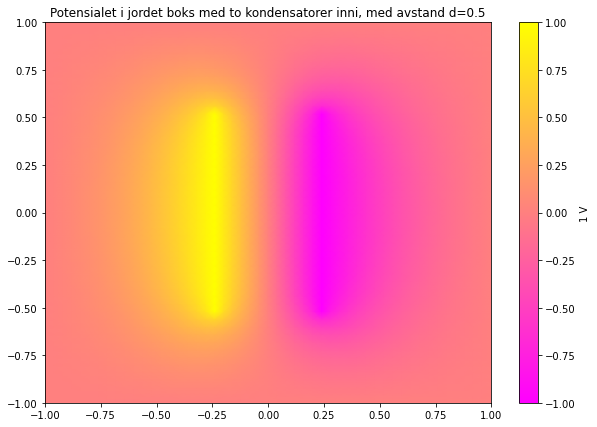

In [7]:
plt.figure(figsize=(10,7))
plt.title(r"Potensialet i jordet boks med to kondensatorer inni, med avstand d=0.5")
plt.pcolormesh(x_coord, y_coord, V_1, shading="gouraud", cmap="spring")
plt.colorbar(label = "1 V")



plt.show()


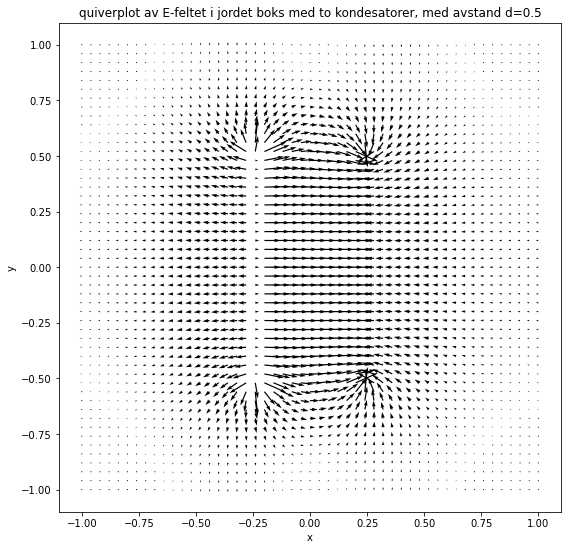

In [5]:
fig, ax = plt.subplots(figsize = (9,9))

Ex, Ey = np.gradient(V_1)
plt.quiver( x_coord, y_coord, -Ey, -Ex)
plt.title("quiverplot av E-feltet i jordet boks med to kondesatorer, med avstand d=0.5")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

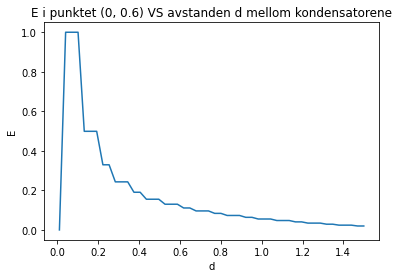

In [10]:
n = 50  #number of values of d to test

def get_E_magnitude(E_x,E_y, x, y):
    #calculates indexes of x and y coordinates
    x_index = int((1+x)*N//2)
    y_index = int((2-y)*N//2)
    return np.sqrt(E_x[y_index][x_index]**2 + E_y[y_index][x_index]**2)   #magnitude of E at (x,y)

plt.figure()
d_vals = np.linspace(0.01, 1.5, n)
E_vals = np.zeros(n)
for i in range (n):
    V = Gauss_Seidel(np.copy(xv), it, d_vals[i], N)
    E_x, E_y = np.gradient(V)
    E_vals[i] = get_E_magnitude(E_x, E_y, 0, 0.6)
    
plt.plot(d_vals, E_vals)
plt.xlabel("d")
plt.title("E i punktet (0, 0.6) VS avstanden d mellom kondensatorene")
plt.ylabel("E")
plt.show()